In [102]:
from sklearn.datasets import load_boston
import pymc3 as pm
import pandas as pd

import theano
import theano.tensor as T

In [103]:
boston = load_boston()

feature_df = pd.DataFrame(boston.data)
feature_df.columns = boston.feature_names
target_df = pd.DataFrame(boston.target)

# feature_df.CHAS = feature_df.CHAS.astype('int')
# feature_df.RAD = feature_df.RAD.astype('int')

In [104]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feature_df, target_df, test_size=0.3)

In [105]:
from sklearn.linear_model import LinearRegression

ols = LinearRegression()
ols.fit(X_train, y_train)
preds = ols.predict(X_test)

In [106]:
from sklearn.metrics import mean_squared_error
import numpy as np

np.sqrt(mean_squared_error(y_test, preds))

5.420319598166251

In [107]:
ols.score(X_test, y_test)

0.641070031894093

In [108]:
n_features = X_train.shape[1]

In [109]:
# X_train = theano.shared(X_train.values)
# y_train = theano.shared(y_train.values)
# X_test = theano.shared(X_test.values)
# y_test = theano.shared(y_test.values)

In [110]:
lin_reg_model = pm.Model()

with lin_reg_model:
    
    alpha = pm.Normal('alpha', mu=0, sigma=10, shape=(1))
    betas = pm.Normal('betas', mu=0, sigma=10, shape=(1, n_features))
    
    s = pm.HalfCauchy('s', beta=10)
    
    temp = alpha + T.dot(X_train, betas.T)

    y = pm.Normal('y', mu=temp, sigma=s, observed=y_train)

In [111]:
lin_reg_model

In [112]:
with lin_reg_model:
    step = pm.NUTS()
    nuts_trace = pm.sample(2000, step)

/home/anyesh/miniconda3/lib/python3.8/site-packages/pymc3/sampling.py:465: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s, betas, alpha]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 51 seconds.
There were 5 divergences after tuning. Increase `target_accept` or reparameterize.


/home/anyesh/miniconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'alpha'}>,
        <AxesSubplot:title={'center':'alpha'}>],
       [<AxesSubplot:title={'center':'betas'}>,
        <AxesSubplot:title={'center':'betas'}>],
       [<AxesSubplot:title={'center':'s'}>,
        <AxesSubplot:title={'center':'s'}>]], dtype=object)

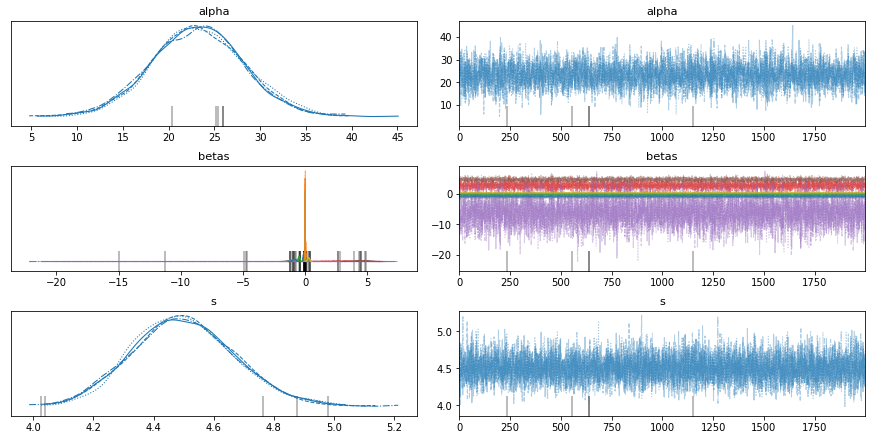

In [113]:
pm.traceplot(nuts_trace)

In [114]:
pm.summary(nuts_trace)

/home/anyesh/miniconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
alpha[0],23.180,4.972,13.909,32.568,0.080,0.056,3894.0,3894.0,3895.0,4589.0,1.0
"betas[0,0]",-0.115,0.036,-0.181,-0.044,0.000,0.000,7297.0,7256.0,7268.0,6054.0,1.0
"betas[0,1]",0.035,0.015,0.008,0.063,0.000,0.000,6115.0,6112.0,6122.0,5687.0,1.0
"betas[0,2]",-0.016,0.067,-0.144,0.109,0.001,0.001,6406.0,4478.0,6403.0,5983.0,1.0
"betas[0,3]",2.637,1.009,0.748,4.554,0.011,0.008,8933.0,8036.0,8940.0,5539.0,1.0
"betas[0,4]",-6.290,3.966,-13.603,1.338,0.051,0.037,6098.0,5698.0,6095.0,5983.0,1.0
"betas[0,5]",4.573,0.451,3.745,5.426,0.007,0.005,4534.0,4526.0,4532.0,5568.0,1.0
"betas[0,6]",-0.014,0.015,-0.043,0.014,0.000,0.000,6706.0,5527.0,6699.0,5738.0,1.0
"betas[0,7]",-1.132,0.225,-1.554,-0.710,0.003,0.002,6000.0,6000.0,5990.0,5959.0,1.0
"betas[0,8]",0.278,0.080,0.134,0.436,0.001,0.001,3993.0,3993.0,3992.0,5335.0,1.0
